## Libraries 

In [1]:
import pandas as pd
import numpy as np
from openpyxl.utils.datetime import from_excel
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import kurtosis
import seaborn as sns
import re

%matplotlib inline 

### Upload file

In [2]:
##Includes datails of trasaction for 2 cab companies
Cab_Data = pd.read_csv('Cab_Data.csv',header=0)

Cab_Data.columns = ['Transaction_ID','Date_of_Travel','Company','City','KM_Travelled','Price_Charged','Cost_of_Trip']

Cab_Data['Date_of_Travel'] = Cab_Data['Date_of_Travel'].apply(from_excel) # Convert the columns Date of travel 

print(Cab_Data.shape)
print (Cab_Data.head(10))
print(Cab_Data.info())

(359392, 7)
   Transaction_ID Date_of_Travel   Company        City  KM_Travelled  \
0        10000011     2016-01-08  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-06  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-02  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-07  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-03  Pink Cab  ATLANTA GA          8.73   
5        10000016     2016-01-07  Pink Cab  ATLANTA GA          6.06   
6        10000017     2016-01-03  Pink Cab   AUSTIN TX         44.00   
7        10000018     2016-01-07  Pink Cab   AUSTIN TX         35.65   
8        10000019     2016-01-12  Pink Cab   BOSTON MA         14.40   
9        10000020     2016-01-06  Pink Cab   BOSTON MA         10.89   

   Price_Charged  Cost_of_Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776

In [3]:
## Contains data on the demographic location of the customers
City_Data = pd.read_csv('City.csv',header=0)

print(City_Data.shape)
print (City_Data.head(10))
print(City_Data.info())

(20, 3)
             City  Population   Users
0     NEW YORK NY     8405837  302149
1      CHICAGO IL     1955130  164468
2  LOS ANGELES CA     1595037  144132
3        MIAMI FL     1339155   17675
4  SILICON VALLEY     1177609   27247
5   ORANGE COUNTY     1030185   12994
6    SAN DIEGO CA      959307   69995
7      PHOENIX AZ      943999    6133
8       DALLAS TX      942908   22157
9      ATLANTA GA      814885   24701
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes
None


In [4]:
## Contains transaction to customer mapping and payment mode
Customer_ID_Data = pd.read_csv('Customer_ID.csv',header=0)

Customer_ID_Data.columns = ['Customer_ID','Gender','Age','Income']

print(Customer_ID_Data.shape)
print (Customer_ID_Data.head(10))
print(Customer_ID_Data.info())

(49171, 4)
   Customer_ID Gender  Age  Income
0        29290   Male   28   10813
1        27703   Male   27    9237
2        28712   Male   53   11242
3        28020   Male   23   23327
4        27182   Male   33    8536
5        27318   Male   25   13984
6        33788   Male   23   23788
7        34106   Male   19   19980
8        59799   Male   33   19271
9        57982   Male   57    5068
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer_ID  49171 non-null  int64 
 1   Gender       49171 non-null  object
 2   Age          49171 non-null  int64 
 3   Income       49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [5]:
## Contains list of US cities, their population and number of cab users
Transaction_ID_Data = pd.read_csv('Transaction_ID.csv',header=0)

Transaction_ID_Data.columns = ['Transaction_ID','Customer_ID','Payment_Mode']

print(Transaction_ID_Data.shape)
print (Transaction_ID_Data.head(10))
print(Transaction_ID_Data.info())

(440098, 3)
   Transaction_ID  Customer_ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card
5        10000016        27318         Cash
6        10000017        33788         Card
7        10000018        34106         Card
8        10000019        59799         Cash
9        10000020        57982         Cash
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction_ID  440098 non-null  int64 
 1   Customer_ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB
None


### Descriptive analysis

In [6]:
Cab_Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Transaction_ID,359392.0,1.022076e+07,126805.803715,10000011.0,1.011081e+07,10221035.50,1.033094e+07,10440107.00
KM_Travelled,359392.0,2.256725e+01,12.233526,1.9,1.200000e+01,22.44,3.296000e+01,48.00
Price_Charged,359392.0,4.234433e+02,274.378911,15.6,2.064375e+02,386.36,5.836600e+02,2048.03
Cost_of_Trip,359392.0,2.861901e+02,157.993661,19.0,1.512000e+02,282.48,4.136832e+02,691.20


In [7]:
print(skew(Cab_Data[['Transaction_ID','KM_Travelled','Price_Charged','Cost_of_Trip']], axis=0, bias=True))
print(kurtosis(Cab_Data[['Transaction_ID','KM_Travelled','Price_Charged','Cost_of_Trip']], axis=0, bias=True))

[7.23262633e-05 5.57786749e-02 8.73757845e-01 1.37957485e-01]
[-1.19892499 -1.12687637  0.74760838 -1.01223536]


As we can see the data of the Cab_Data dataset as well as KM travel, price charged and cost of trip would have a normal distribution since the skewness of the 3 variables tends to zero, likewise the distribution shows that we would not have many outliers since the kurtosis of the 3 variables is <3 and this could also be contrasted in that the mean and the 50% quartile are close and as the mean is sensitive to outliers, this proves that we do not have significant outliers that affect the data.

In [8]:
##The Sturges rule for histograms
num_data = len(Cab_Data)
num_bins = np.int(np.log2(num_data)) + 1

C:\Users\ASUS\AppData\Local\Temp/ipykernel_26048/2541175764.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  num_bins = np.int(np.log2(num_data)) + 1


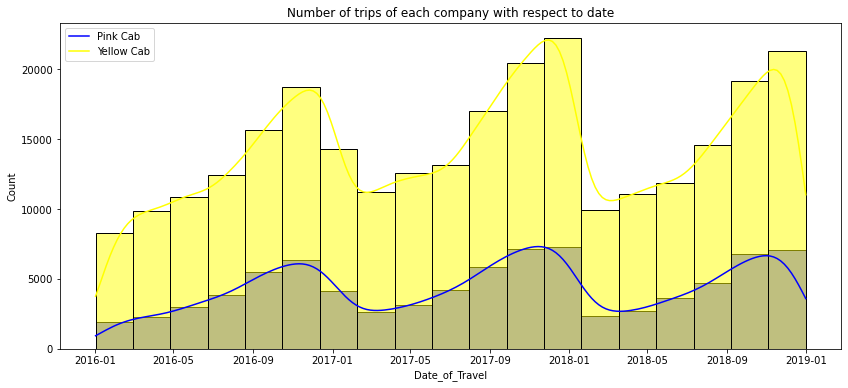

In [9]:
# plt.figure(figsize = (14,6))
# plt.title('Data of travel')
# sns.set_color_codes("pastel")
# sns.histplot(Cab_Data['Date_of_Travel'], bins=num_bins,color="blue")
#########
Pink = Cab_Data.loc[Cab_Data['Company'] == 'Pink Cab']["Date_of_Travel"]
Yellow = Cab_Data.loc[Cab_Data['Company'] == 'Yellow Cab']["Date_of_Travel"]
plt.figure(figsize = (14,6))
plt.title('Number of trips of each company with respect to date')
sns.set_color_codes("pastel")
sns.histplot(Pink,kde=True,bins=num_bins, color="blue")
sns.histplot(Yellow,kde=True,bins=num_bins, color="yellow")
plt.legend(labels=['Pink Cab','Yellow Cab'])
plt.show()

It can be seen that Yellow Cab has a higher demand compared to Pink Cab However it can be observed that the number of clients is related to the seasons of the year, we can see that at a certain time of the year the number of clients increases or decreases. But it can be observed that Yellow Cab has a higher increase of clients than Pink Cap, compared to their previous years, as mentioned before, each company has an increase and decrease of clients depending on the season of the year, but Yellow Cab gains more clients in the following season.

In [11]:
def grafcate(graf):
    for column in graf.select_dtypes(include='object'):
        sns.countplot(y=column, data=graf)
        plt.show()

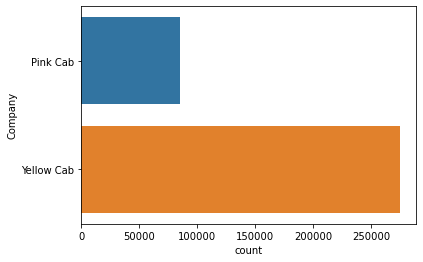

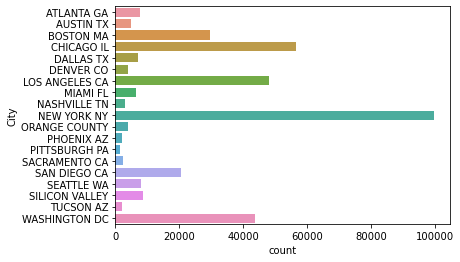

In [12]:
grafcate(Cab_Data)

We see that the yellow cap has a higher number of trips than the pink cab.
And that the larger states are the ones that have a greater flow of companies.

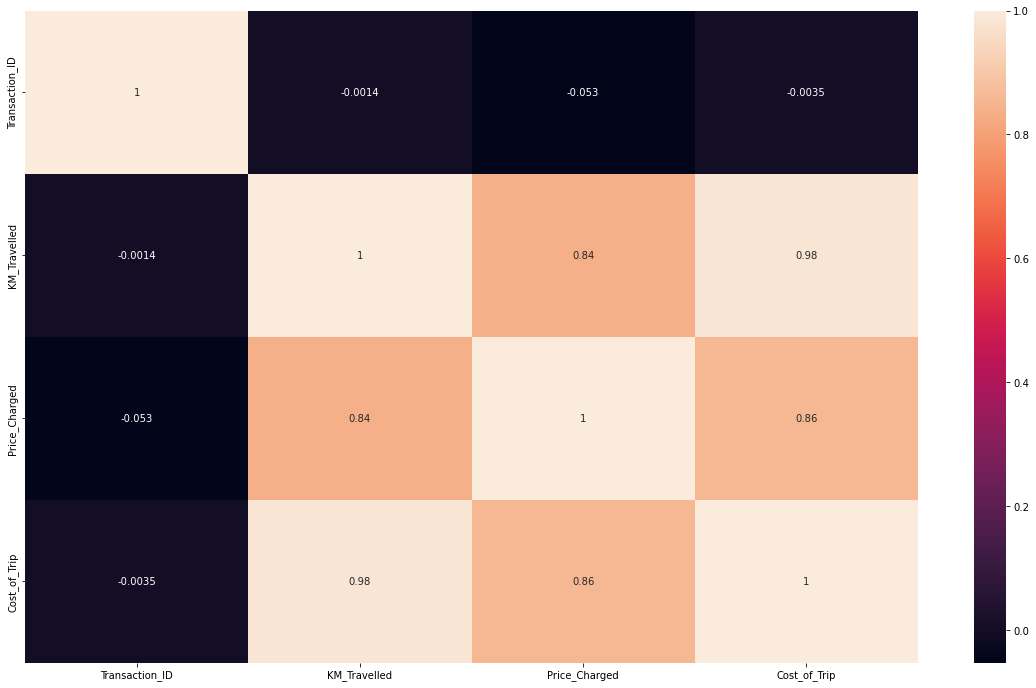

In [13]:
#Correlation analysis
plt.figure(figsize = (20,12))
corrMatrix = Cab_Data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

We can observe that the variables KM_traveled, price charged and cost of trip are directly related to each other
since the higher the km traveled, the higher the cost of the trip.

In [14]:
City_Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Population,20.0,1231592.00,1.740127e+06,248968.0,608637.25,784559.0,1067041.0,8405837.0
Users,20.0,64520.65,8.349938e+04,3643.0,11633.25,23429.0,91766.0,302149.0


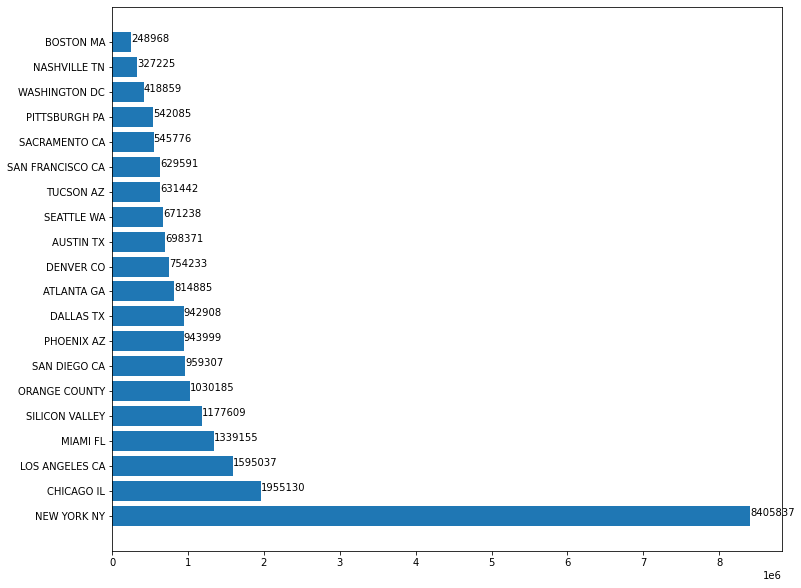

In [15]:
#Population of each states
fig1 = plt.figure(1)
plt.barh(City_Data['City'], City_Data['Population'])
for index, value in enumerate(City_Data['Population']): 
    plt.text(value, index, 
             str(value)) 

    
    
fig1.set_size_inches(12, 10)
plt.show() 
plt.show()

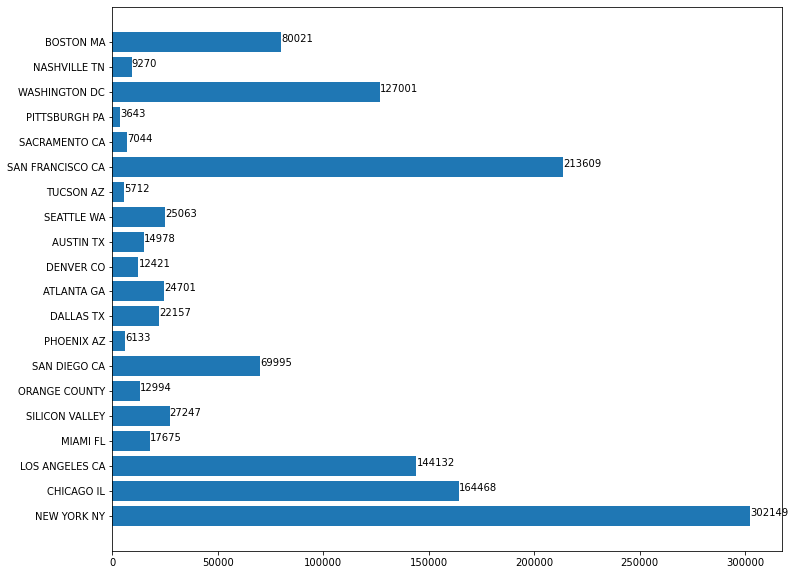

In [16]:
fig1 = plt.figure(1)
plt.barh(City_Data['City'], City_Data['Users'])
for index, value in enumerate(City_Data['Users']): 
    plt.text(value, index, 
             str(value)) 

    
    
fig1.set_size_inches(12, 10)
plt.show() 

We can easily see that the distribution of the data is not asymmetric and could have outliers, but in this case they are not considered as such since they are more useful to obtain more information from the companies.

In [17]:
Customer_ID_Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Customer_ID,49171.0,28398.252283,17714.137333,1.0,12654.5,27631.0,43284.5,60000.0
Age,49171.0,35.363121,12.599066,18.0,25.0,33.0,42.0,65.0
Income,49171.0,15015.631856,8002.208253,2000.0,8289.5,14656.0,21035.0,35000.0


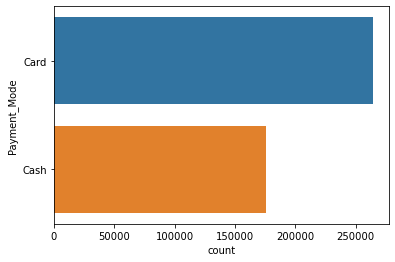

In [18]:
grafcate(Transaction_ID_Data)

## Profit analysis grouped by age

In [19]:
df = pd.merge(Cab_Data, Transaction_ID_Data, on = 'Transaction_ID')

In [20]:
df2=df.groupby(by=['Company','Customer_ID']).sum() ##Grouped by company and customer IDs

In [21]:
df2=df2.reset_index()
df3 = pd.merge(Customer_ID_Data, df2, on = 'Customer_ID')#We join the table to have the information of customer spending for each compan 
df3

,Customer_ID,Gender,Age,Income,Company,Transaction_ID,KM_Travelled,Price_Charged,Cost_of_Trip
0,29290,Male,28,10813,Pink Cab,10000011,30.45,370.95,313.6350
1,29290,Male,28,10813,Yellow Cab,20764048,68.74,1390.75,914.8248
2,27703,Male,27,9237,Pink Cab,20395638,42.01,525.55,476.7880
3,27703,Male,27,9237,Yellow Cab,20645231,42.56,859.50,554.6280
4,28712,Male,53,11242,Pink Cab,10000013,9.04,125.20,97.6320
...,...,...,...,...,...,...,...,...,...
72221,38520,Female,42,19417,Yellow Cab,10439790,16.66,261.18,213.9144
72222,12490,Male,33,18713,Yellow Cab,10439799,13.72,277.97,172.8720
72223,41414,Male,38,3960,Yellow Cab,10439838,19.00,303.77,232.5600
72224,41677,Male,23,19454,Yellow Cab,10439840,5.60,92.42,70.5600


In [22]:
bins=[18,25,35,45,55,65]
labels=['18-25','26-35','36-45','46-55','56-65']
df3['Range-Age']=pd.cut(df3['Age'], bins, labels = labels)#Create ages ranges



In [23]:
df4=df3.groupby(by=['Company','Range-Age']).sum() #Group by for campany and ages ranges
df4=df4.reset_index()
Pink = df4.loc[df4['Company'] == 'Pink Cab']
Yellow = df4.loc[df4['Company'] == 'Yellow Cab'].reset_index()

In [24]:
bar = pd.DataFrame()
bar['Range-Age']=Pink['Range-Age']
bar['Pink_Cab']=Pink['Price_Charged']
bar['Yellow_Cab']=Yellow['Price_Charged']


In [25]:
bar

,Range-Age,Pink_Cab,Yellow_Cab
0,18-25,6068729.60,28903304.60
1,26-35,8322386.44,39646321.02
2,36-45,5508631.13,26753616.10
3,46-55,2798222.82,13632212.41
4,56-65,2799302.89,13146043.19


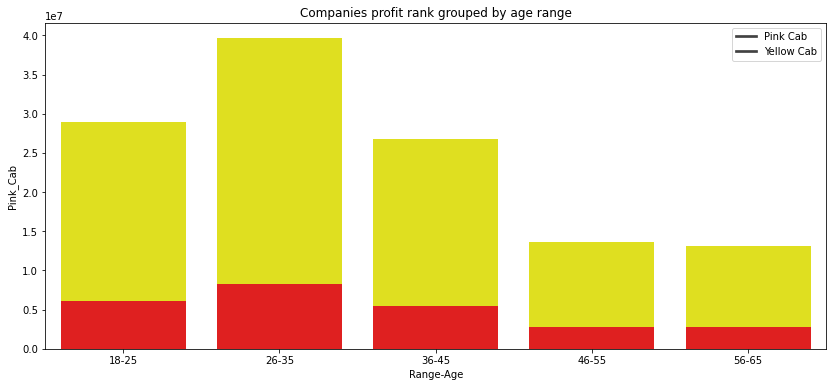

In [26]:
plt.figure(figsize = (14,6))
plt.title('Companies profit rank grouped by age range')
sns.set_color_codes("pastel")
sns.barplot(x='Range-Age', y='Yellow_Cab', data=bar,color="yellow")
sns.barplot(x='Range-Age', y='Pink_Cab', data=bar,color="red")
plt.legend(labels=['Pink Cab','Yellow Cab'])
plt.show()


## Number of customers in the states of each company

In [27]:
df1=Cab_Data.groupby(by=['Company','City']).count().reset_index() ##Grouped by company and customer IDs

In [28]:
df = pd.merge(City_Data, df1, on = 'City')

In [29]:
Pink = df.loc[df['Company'] == 'Pink Cab'].reset_index()
Yellow = df.loc[df['Company'] == 'Yellow Cab'].reset_index()

In [30]:
city = pd.DataFrame()
city['City']=Pink['City']
city['Pink_Cab_count']=Pink['Transaction_ID']
city['Yellow_Cab_count']=Yellow['Transaction_ID']

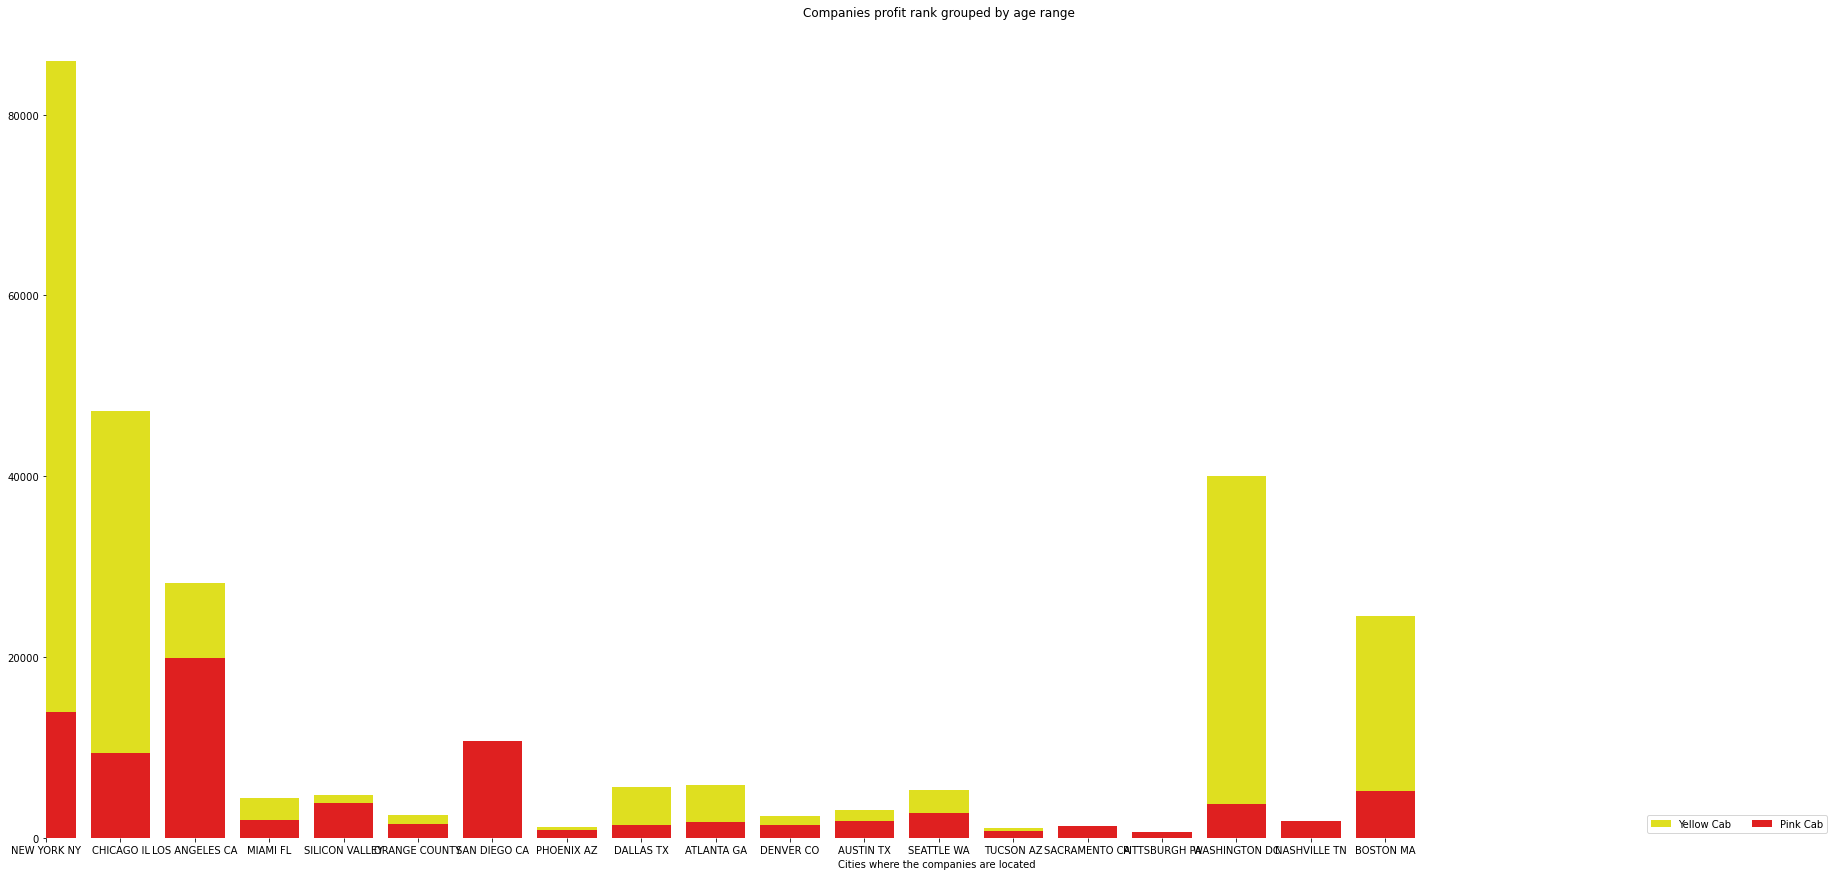

In [31]:

f, ax = plt.subplots(figsize=(32,15))
plt.title('Companies profit rank grouped by age range')
sns.set_color_codes("pastel")
sns.barplot(x='City', y='Yellow_Cab_count', data=city,label='Yellow Cab', color="yellow")
sns.barplot(x='City', y='Pink_Cab_count', data=city,label='Pink Cab',color="red")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Cities where the companies are located ")
sns.despine(left=True, bottom=True)


## Cost of KM of each company

In [32]:
Cab_Data['Cost_KM']=Cab_Data['Price_Charged']/Cab_Data['KM_Travelled']
Pink = Cab_Data.loc[Cab_Data['Company'] == 'Pink Cab'].reset_index()
Yellow = Cab_Data.loc[Cab_Data['Company'] == 'Yellow Cab'].reset_index()

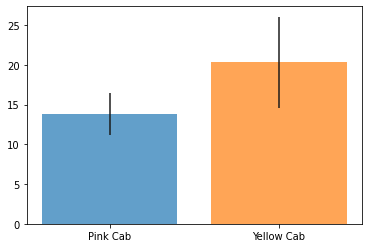

In [33]:
value=Pink['Cost_KM'].mean()
sd=Pink['Cost_KM'].std()
value1=Yellow['Cost_KM'].mean()
sd1=Yellow['Cost_KM'].std()
fig1 = plt.figure(1)
plt.bar('Pink Cab', value, yerr = sd, alpha=0.7, label = 'Yellow Cab')
plt.bar('Yellow Cab', value1, yerr = sd1, alpha=0.7, label = 'Yellow Cab')
plt.show()